# Bowtie2

## 0. Разбораться с Bowtie2 
Построить индекс, запустить Bowtie2 на тестовых данных, определить процент приложившихся ридов. 

In [ ]:
! bowtie2-build MG1655-K12.first10K.fasta 

##  1. Покрытие генома.
По SAM файлу построить график покрытия генома, определить среднее покрытие и долю покрытой области генома. Покрытие одной позиции в геноме есть количество ридов, приложившихся так, что их концы находятся по разные стороны от этой позиции. График можно строить усредняя, например, по 1000 нуклеотидов. Доля покрытой области генома определяется как процент нуклеотидов с ненулевым покрытием по отношению ко всей длине генома.

In [1]:
from Bio import SeqIO

def getRefLen(file_name):
    sum_len = 0
    for rec in SeqIO.parse(file_name, "fasta"):
        sum_len += len(rec.seq)
    return sum_len

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

def showNGx(ref_file_name, contig_file_name):
    ys = genNGx(ref_file_name, contig_file_name)
    
    while (len(ys) < 101):
        ys.append(-1)
    ys = ys[0:101]
    
    xs = [i for i in range(0, 101)]
    
    plt.plot(xs, ys, 'bo')
    plt.axis([0, 101, 0, max(ys) + 5])
    plt.xlabel('NGx')
    plt.ylabel('Contig Len')
    plt.title(contig_file_name)
    plt.show()

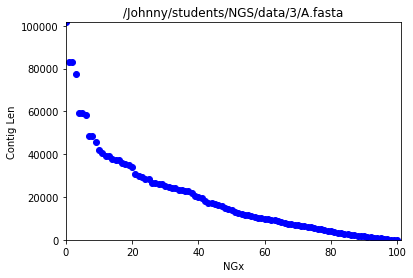

In [8]:
showNGx("/Johnny/students/NGS/data/3/reference.fasta", "/Johnny/students/NGS/data/3/A.fasta")

## 2. Распределение расстояния вставки.
По SAM файлу построить график распределения расстояния вставки, определить среднее расстояние вставки, среднеквадратичное отклонение и интервал минимальной ширины, в который попадает 95% ридов. На графике по оси Х должно быть расстояние вставки, по оси Y — количество ридов в заданным расстоянием вставки.

In [ ]:
! /Molly/chernikova/soft/quast/quast.py /Johnny/students/NGS/data/3/A.fasta /Johnny/students/NGS/data/3/B.fasta /Johnny/students/NGS/data/3/C.fasta /Johnny/students/NGS/data/3/D.fasta /Johnny/students/NGS/data/3/E.fasta -R /Johnny/students/NGS/data/3/reference.fasta -o ./

In [23]:
! convert basic_stats/NGx_plot.pdf basic_stats/NGx_plot.jpg

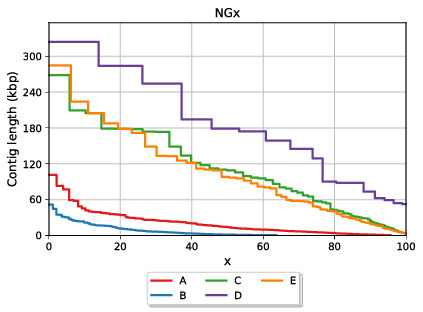

In [24]:
from IPython.display import Image
Image("basic_stats/NGx_plot.jpg")

## 3. Частоты различных замен
Построить матрицу частот замен:

Так, в ячейке (А,С) должно стоять количество ошибок замены С на А (С в референсе, А в риде).